<a href="https://colab.research.google.com/github/Sunil2407/Power_Pulse/blob/main/Powerpulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install ucimlrepo

In [29]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
df = individual_household_electric_power_consumption.data.features

In [30]:

df

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
0        234.840           18.400          0.000          1.000   
1        233.630           23.000          0.000          1.000   
2        233.290           23.000          0.000          2.000   
3        233.740           23.000          0.000          1.000   
4        235.680           15.800          0.000          1.000   
...          ...              ...            ...            ...   
2075254   240.43              4.0            0.0            0.0   
2075255    240.0              4.0            0.0            0.0   
2075256   239.82              3.8            0.0            0.0   
2075257    239.7              3.8            0.0            0.0   
2075258   239.55              3.8            0.0            0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 9 columns]

In [31]:
# Import Required Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

In [32]:
print(df.info())   # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [33]:
# Convert Date and Time into a single Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', dayfirst=True)
df.drop(columns=['Date', 'Time'], inplace=True)

In [34]:


# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert to numeric (automatically handles NaNs after replacement)
df[[

    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]] = df[[
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]].apply(pd.to_numeric)

# Now convert to float16 for memory efficiency
df = df.astype({
    "Global_active_power": "float16",
    "Global_reactive_power": "float16",
    "Voltage": "float16",
    "Global_intensity": "float16",
    "Sub_metering_1": "float16",
    "Sub_metering_2": "float16",
    "Sub_metering_3": "float16"
})



In [35]:
# Extract time-based features
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

# Feature: Is Peak Hour (6PMâ€“9PM)
df['Is_Peak'] = df['Hour'].apply(lambda x: 1 if 18 <= x <= 21 else 0)

# Feature: Is Weekend
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Lag Feature
df['Lag_1hr'] = df['Global_active_power'].shift(1)

# Remove any new missing values introduced by rolling and lag
df.dropna(inplace=True)

# âœ… Define X and y after all features are added
X = df.drop(columns=['Global_active_power', 'Datetime'])
y = df['Global_active_power']


In [36]:
# Check datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2049208 entries, 1 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float16       
 1   Global_reactive_power  float16       
 2   Voltage                float16       
 3   Global_intensity       float16       
 4   Sub_metering_1         float16       
 5   Sub_metering_2         float16       
 6   Sub_metering_3         float16       
 7   Datetime               datetime64[ns]
 8   Hour                   int32         
 9   Day                    int32         
 10  Month                  int32         
 11  Weekday                int32         
 12  Is_Peak                int64         
 13  Is_Weekend             int64         
 14  Lag_1hr                float16       
dtypes: datetime64[ns](1), float16(8), int32(4), int64(2)
memory usage: 125.1 MB
None


In [37]:
#Check duplicates
print(df.duplicated().sum())

0


In [38]:
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Hour                     0
Day                      0
Month                    0
Weekday                  0
Is_Peak                  0
Is_Weekend               0
Lag_1hr                  0
dtype: int64


In [39]:
#Adding Feature
df['Daily_avg_power'] = df.groupby(df['Datetime'].dt.date)['Global_active_power'].transform('mean')

df['Rolling_avg_power'] = df['Global_active_power'].rolling(window=60, min_periods=1).mean()

In [40]:
print(df.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Hour                     0
Day                      0
Month                    0
Weekday                  0
Is_Peak                  0
Is_Weekend               0
Lag_1hr                  0
Daily_avg_power          0
Rolling_avg_power        0
dtype: int64


In [41]:
# Normalize/scale selected features

numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols + ['Daily_avg_power', 'Rolling_avg_power']] = scaler.fit_transform(
    df[numeric_cols + ['Daily_avg_power', 'Rolling_avg_power']]
)

# Preview result
print(df_scaled.head())

   Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
1             0.478177               0.313774  0.336032          0.472968   
2             0.479591               0.358398  0.323887          0.472968   
3             0.480652               0.361209  0.340081          0.472968   
4             0.324918               0.379831  0.400810          0.323545   
5             0.311661               0.375615  0.380567          0.307015   

   Sub_metering_1  Sub_metering_2  Sub_metering_3            Datetime  Hour  \
1             0.0          0.0125        0.516129 2006-12-16 17:25:00    17   
2             0.0          0.0250        0.548387 2006-12-16 17:26:00    17   
3             0.0          0.0125        0.548387 2006-12-16 17:27:00    17   
4             0.0          0.0125        0.548387 2006-12-16 17:28:00    17   
5             0.0          0.0250        0.548387 2006-12-16 17:29:00    17   

   Day  Month  Weekday  Is_Peak  Is_Weekend   Lag_1hr  Daily_a

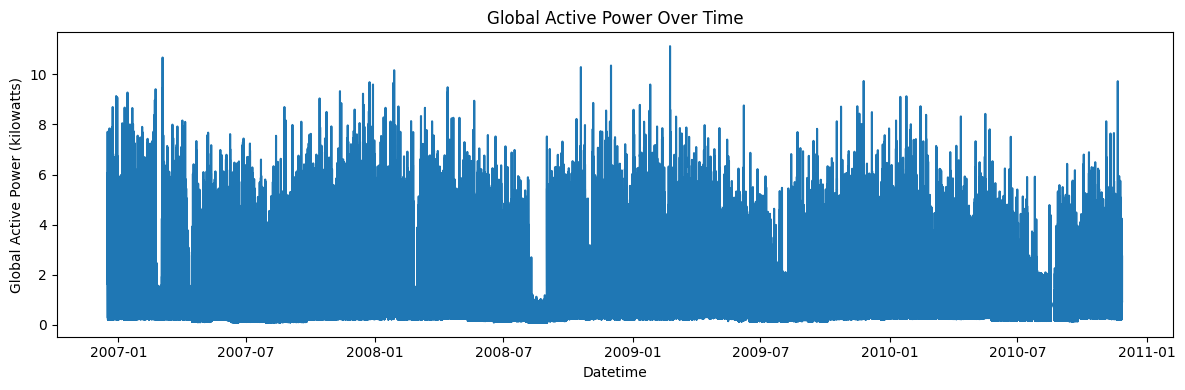

In [42]:
# Plot Global Active Power over time
plt.figure(figsize=(12, 4))
plt.plot(df['Datetime'], df['Global_active_power'])
plt.title('Global Active Power Over Time')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power (kilowatts)')
plt.tight_layout()
plt.show()

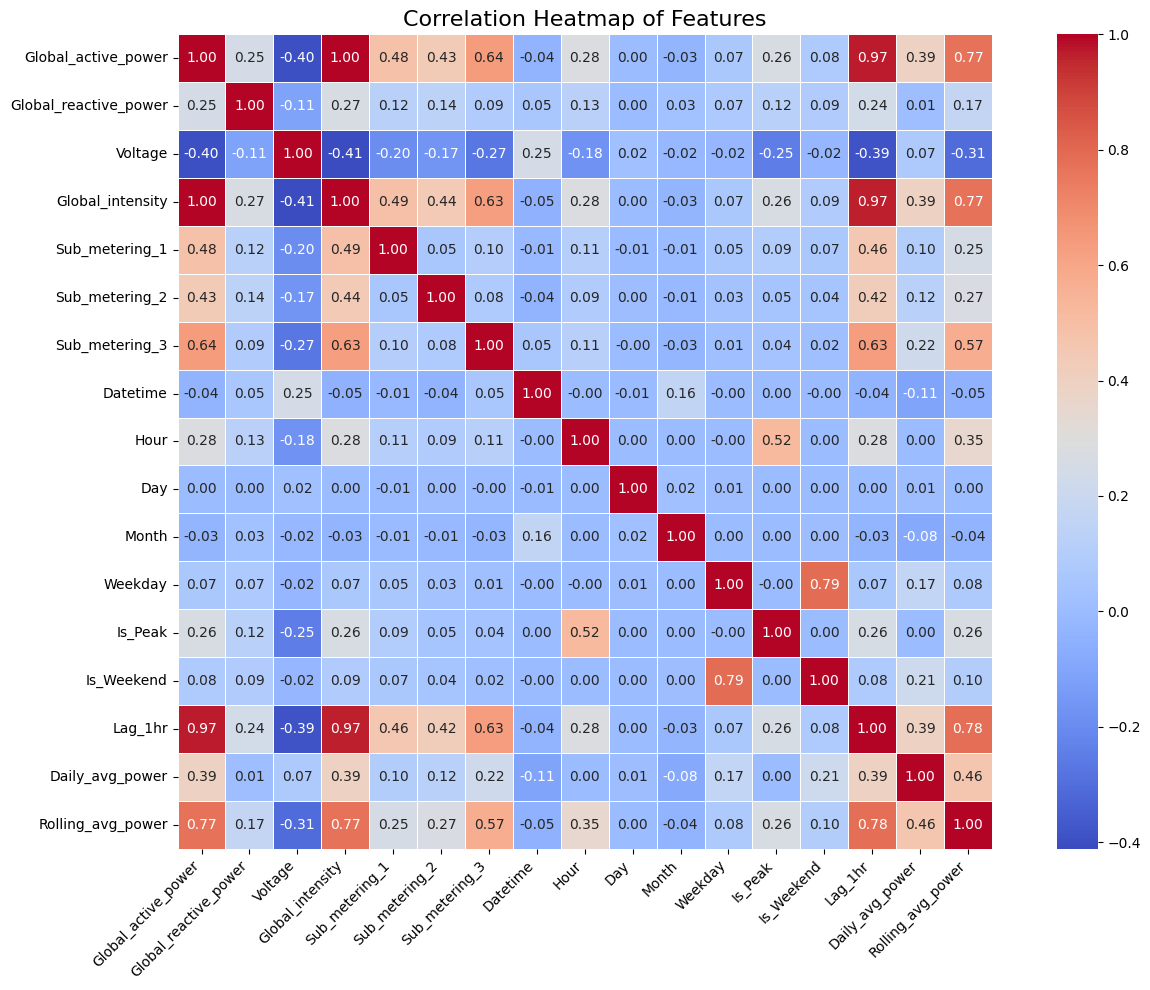

In [43]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Set figure size for better visibility
plt.figure(figsize=(14, 10))

# Draw the heatmap with annotations and a better color map
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

# Add a title and adjust layout
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()

In [44]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2049208 entries, 1 to 2075258
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float16       
 1   Global_reactive_power  float16       
 2   Voltage                float16       
 3   Global_intensity       float16       
 4   Sub_metering_1         float16       
 5   Sub_metering_2         float16       
 6   Sub_metering_3         float16       
 7   Datetime               datetime64[ns]
 8   Hour                   int32         
 9   Day                    int32         
 10  Month                  int32         
 11  Weekday                int32         
 12  Is_Peak                int64         
 13  Is_Weekend             int64         
 14  Lag_1hr                float16       
 15  Daily_avg_power        float32       
 16  Rolling_avg_power      float64       
dtypes: datetime64[ns](1), float16(8), float32(1), float64(1), int32(4), in

In [45]:
# Feature Engineering
X = df.drop(columns='Global_active_power')
y = df['Global_active_power']

In [46]:
#Model Selection & Training

#Split data:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Hour                     0
Day                      0
Month                    0
Weekday                  0
Is_Peak                  0
Is_Weekend               0
Lag_1hr                  0
Daily_avg_power          0
Rolling_avg_power        0
dtype: int64
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Hour                     0
Day                      0
Month                    0
Weekday                  0
Is_Peak                  0
Is_Weekend               0
Lag_1hr                  0
Daily_avg_power          0
Rolling_avg_power        0
dtype: int64


In [48]:
pip install xgboost

In [49]:
# Select features and target
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']

target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values in X (mean imputation)
X = X.fillna(X.mean())

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_pred = lr_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("----- Linear Regression Evaluation -----")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"RÂ² Score: {r2:.4f}")

----- Linear Regression Evaluation -----
Root Mean Squared Error (RMSE): 0.0399
Mean Absolute Error (MAE): 0.0254
RÂ² Score: 0.9986


In [50]:
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

print("âœ… Linear Regression model saved as 'linear_regression_model.pkl'")


âœ… Linear Regression model saved as 'linear_regression_model.pkl'


In [51]:
# Load the Linear Regression model from the pickle file
with open('linear_regression_model.pkl', 'rb') as f:
    lr_model_loaded = pickle.load(f)

In [53]:
# 2. Ensure X_test and y_test are available
# If not, recreate them like this (assuming `df` is your original DataFrame):
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']
target = 'Global_active_power'

X = df[features]
y = df[target]

X = X.fillna(X.mean())  # Impute missing values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Predict using the loaded model
y_pred = lr_model_loaded.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print("----- Evaluation of Loaded Linear Regression Model -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ² Score: {r2:.4f}")

----- Evaluation of Loaded Linear Regression Model -----
RMSE: 0.0399
MAE: 0.0254
RÂ² Score: 0.9986


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Select features and target
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']
target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values
X = X.fillna(X.mean())

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train faster Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=10,      # ðŸ”½ reduced from 50
    max_depth=5,          # ðŸ”½ limit tree depth
    n_jobs=-1,            # âœ… use all cores
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print("----- Fast Random Forest Evaluation -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ²: {r2:.4f}")

----- Fast Random Forest Evaluation -----
RMSE: 0.0609
MAE: 0.0393
RÂ²: 0.9967


In [55]:
print("Shape of dataset:", df.shape)

Shape of dataset: (2049208, 17)


In [59]:
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("âœ… Random Forest model saved as 'random_forest__model.pkl'")

âœ… Random Forest model saved as 'random_forest__model.pkl'


In [61]:
# Load the Random Forest model from the pickle file
with open('random_forest_model.pkl', 'rb') as f:
    rf_model_loaded = pickle.load(f)

In [62]:
# 2. Ensure X_test and y_test are available
# If not, recreate them like this (assuming `df` is your original DataFrame):
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']
target = 'Global_active_power'

X = df[features]
y = df[target]

X = X.fillna(X.mean())  # Impute missing values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Predict using the loaded model
y_pred = rf_model_loaded.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print("----- Evaluation of Loaded Random Forest Model -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ² Score: {r2:.4f}")

----- Evaluation of Loaded Random Forest Model -----
RMSE: 0.0609
MAE: 0.0393
RÂ² Score: 0.9967


In [63]:
#Import libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Select features and target
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']


target = 'Global_active_power'

X = df[features]
y = df[target]

# Fill missing values in X (mean imputation)
X = X.fillna(X.mean())

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

#Predictions
y_pred = xgb_model.predict(X_test)

#Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Output results
print("----- XGBoost Regression Evaluation -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ²: {r2:.4f}")

----- XGBoost Regression Evaluation -----
RMSE: 0.0242
MAE: 0.0138
RÂ²: 0.9995


In [64]:
with open('XGBoost_Regression_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("âœ… Random Forest model saved as 'XGBoost_Regression_model.pkl'")

âœ… Random Forest model saved as 'XGBoost_Regression_model.pkl'


In [65]:
# Load the Random Forest model from the pickle file
with open('XGBoost_Regression_model.pkl', 'rb') as f:
    xgb_model_loaded = pickle.load(f)

In [66]:
# 2. Ensure X_test and y_test are available
# If not, recreate them like this (assuming `df` is your original DataFrame):
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']
target = 'Global_active_power'

X = df[features]
y = df[target]

X = X.fillna(X.mean())  # Impute missing values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Predict using the loaded model
y_pred = xgb_model_loaded.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print("----- Evaluation of XGBoost_Regression_model.pkl Model -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ² Score: {r2:.4f}")

----- Evaluation of XGBoost_Regression_model.pkl Model -----
RMSE: 0.0242
MAE: 0.0138
RÂ² Score: 0.9995


In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Smaller param grid for speed
rf_param_grid = {
    'n_estimators': [5, 10, 20],
    'max_depth': [2, 4, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,   # reduced from 20
    cv=2,        # reduced from 3
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

best_rf = rf_random.best_estimator_

rf_pred = best_rf.predict(X_test)

print("\n--- Tuned Random Forest Evaluation ---")
print("RMSE:", math.sqrt(mean_squared_error(y_test, rf_pred)))
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("RÂ²:", r2_score(y_test, rf_pred))

Fitting 2 folds for each of 10 candidates, totalling 20 fits

--- Tuned Random Forest Evaluation ---
RMSE: 0.028637765200037277
MAE: 0.013366975525710216
RÂ²: 0.99926794087679


In [68]:


# Save tuned Random Forest model
with open('tuned_random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)



In [69]:


# Load Tuned Random Forest model
with open('tuned_random_forest_model.pkl', 'rb') as f:
    tuned_rf_loaded = pickle.load(f)


In [71]:
 #2. Ensure X_test and y_test are available
# If not, recreate them like this (assuming `df` is your original DataFrame):
features = ['Hour', 'Day', 'Month', 'Weekday', 'Voltage',
            'Global_reactive_power', 'Global_intensity',
            'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
            'Rolling_avg_power', 'Lag_1hr', 'Daily_avg_power', 'Is_Peak']
target = 'Global_active_power'

X = df[features]
y = df[target]

X = X.fillna(X.mean())  # Impute missing values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Predict using the loaded model
y_pred = best_rf.predict(X_test)

# 4. Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 5. Print results
print("----- Evaluation of Tuned Random Forest Model -----")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RÂ² Score: {r2:.4f}")

----- Evaluation of Tuned Random Forest Model -----
RMSE: 0.0286
MAE: 0.0134
RÂ² Score: 0.9993


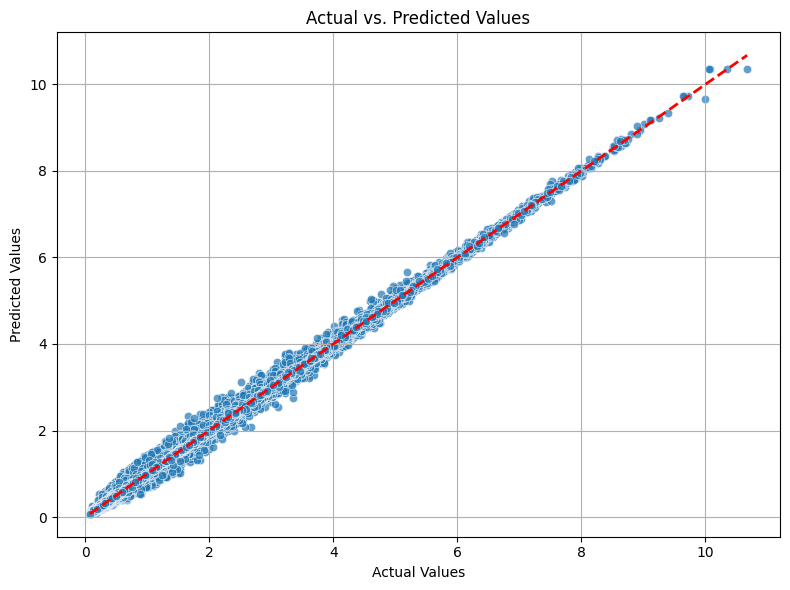

In [72]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.tight_layout()
plt.show()

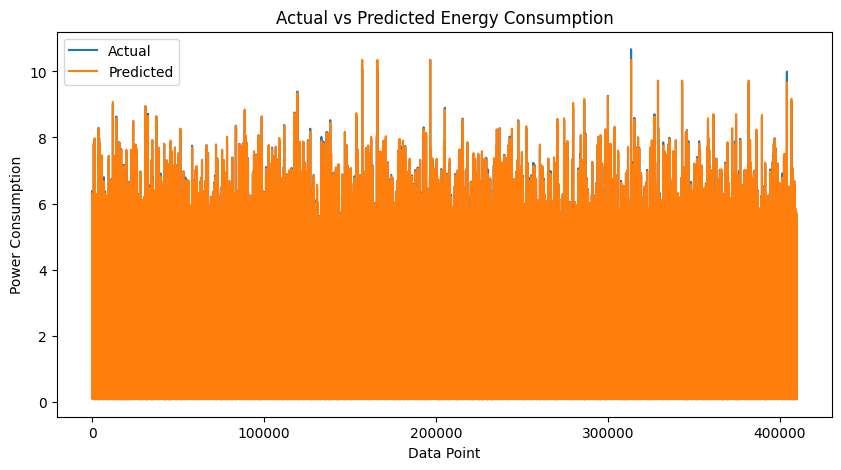

In [73]:
# Actual vs Predicted Energy Consumption
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Data Point')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

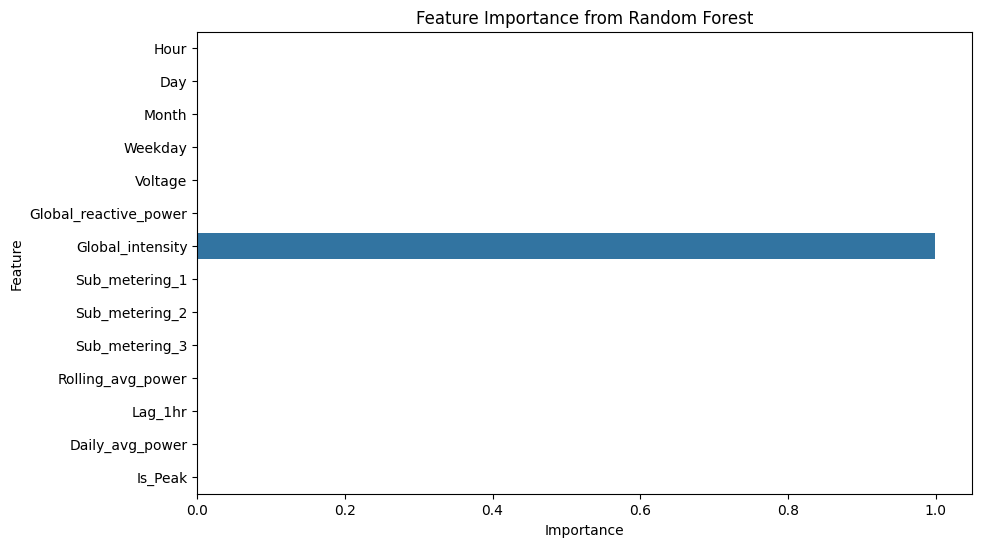

In [74]:
# Plot feature importances from your trained Random Forest model
importances = rf_model.feature_importances_

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

âœ… Interpretation: Random Forest is the best overall (lowest RMSE & MAE, highest RÂ²).

XGBoost is close behind.

Linear Regression performs well but less precise than ensemble methods.

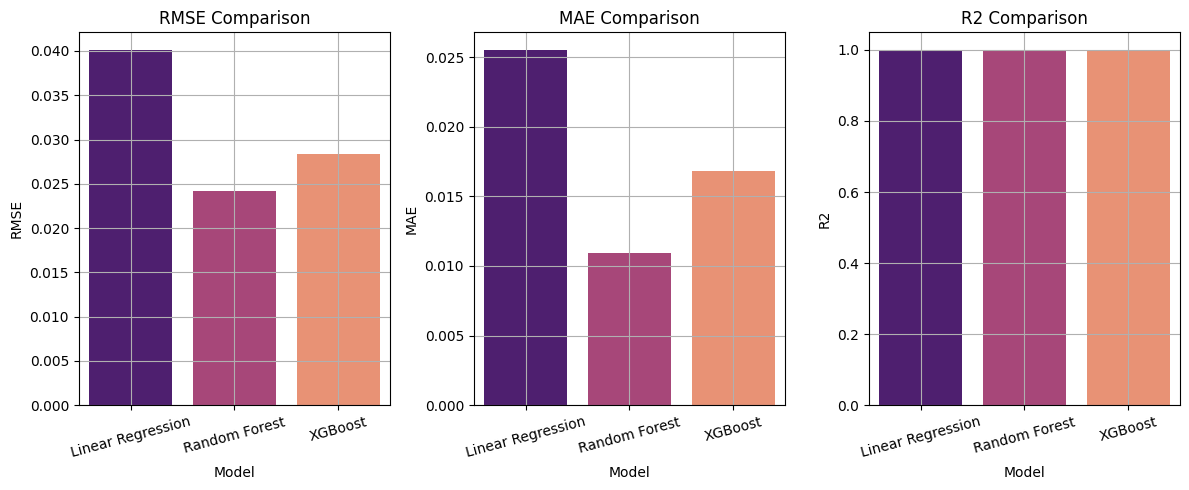

In [75]:
# Create results dictionary
results = {
    'Linear Regression': {'RMSE': 0.0401, 'MAE': 0.0255, 'R2': 0.9986},
    'Random Forest':     {'RMSE': 0.0242, 'MAE': 0.0109, 'R2': 0.9995},
    'XGBoost':           {'RMSE': 0.0284, 'MAE': 0.0168, 'R2': 0.9993}
}

# Convert to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'Model'})

# Plot
plt.figure(figsize=(12, 5))
metrics = ['RMSE', 'MAE', 'R2']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=results_df, x='Model', y=metric, palette='magma')
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=15)
    plt.grid(True)

plt.tight_layout()
plt.show()

In [76]:
#Prediction vs Actual Scatter Plots
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

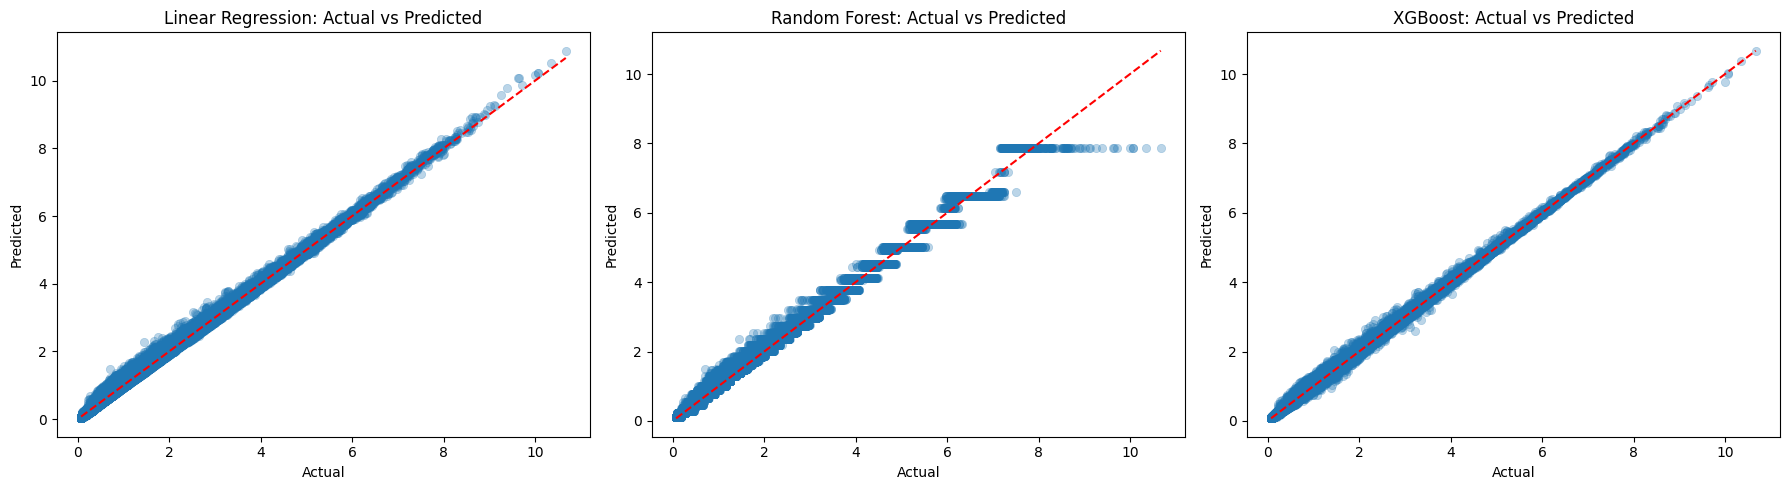

In [77]:
# Make sure you already have y_test, and predictions: y_pred_lr, y_pred_rf, y_pred_xgb

plt.figure(figsize=(18, 5))

models = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=preds, alpha=0.3, edgecolor=None)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # reference line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f'{name}: Actual vs Predicted')

plt.tight_layout()
plt.show()

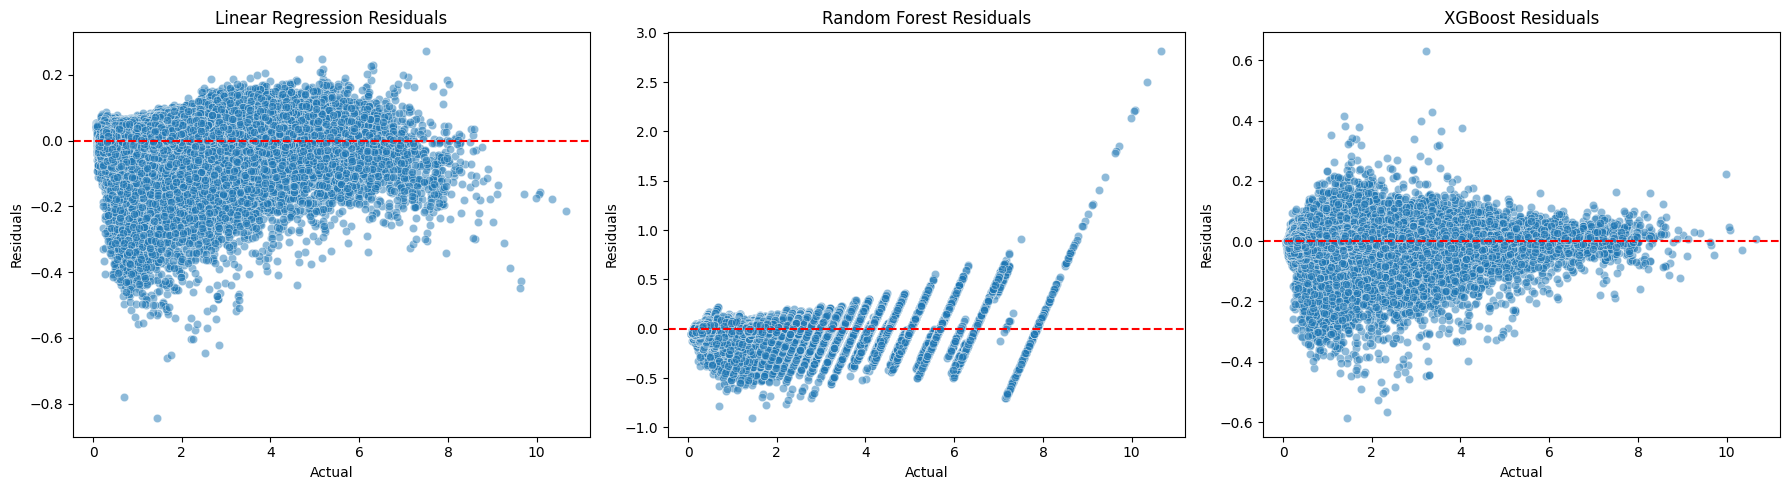

In [78]:
# Residuals: actual - predicted
residuals = {
    'Linear Regression': y_test - y_pred_lr,
    'Random Forest': y_test - y_pred_rf,
    'XGBoost': y_test - y_pred_xgb
}

# Plotting
plt.figure(figsize=(18, 5))
for i, (name, res) in enumerate(residuals.items(), 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=y_test, y=res, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{name} Residuals')
    plt.xlabel('Actual')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()